## Problem Statement 2

Drugs are generally administered/prescribed by the physicians for a certain
period of time or they are administered at regular intervals, but for various reasons patients
might stop taking the treatment . Consider following example for better understanding
Let’s say you get a throat infection, the physician prescribes you an antibiotic for 10 days,
but you stop taking the treatment after 3 days because of some adverse events.
In the above example ideal treatment duration is 10 days but patients stopped taking
treatment after 3 days due to adverse events. Patients stopping a treatment is called dropoff.
We want to study dropoff for “Target Drug”, the aim is to generate insights on what events
lead to patients stopping on “Target Drug”.
Assume ideal treatment duration for “Target Drug” is 1 year, come up with analysis showing
how drop-off rate is, dropoff rate is defined as number of patients dropping off each month.
Then come up with analysis to generate insights on what events are driving a patient to stop
taking “Target Drug”.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_parquet("train.parquet")

In [4]:
train_df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [5]:
# calculating drop off rating 

target_data = train_df[train_df['Incident'] == "TARGET DRUG"]

In [7]:
target_data['Date'] = pd.to_datetime(target_data["Date"])
target_data['Month'] = target_data['Date'].dt.month
dropoff_rates = target_data.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)

C:\Users\Vijai\AppData\Local\Temp\ipykernel_15960\63504779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['Date'] = pd.to_datetime(target_data["Date"])
C:\Users\Vijai\AppData\Local\Temp\ipykernel_15960\63504779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['Month'] = target_data['Date'].dt.month


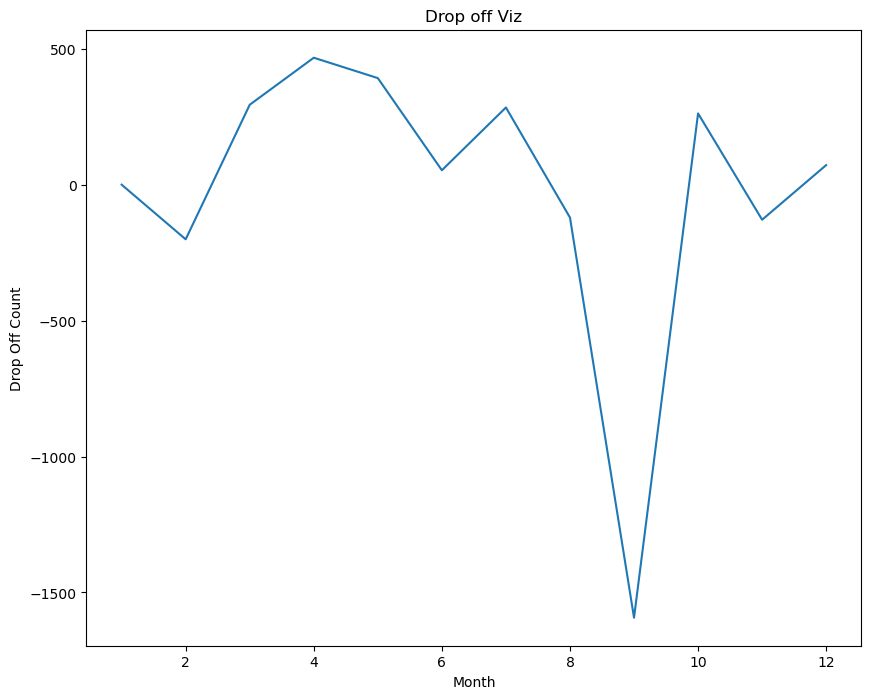

In [13]:
#Plot

plt.figure(figsize=(10,8))
dropoff_rates.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Drop Off Count')
plt.title('Drop off Viz')
plt.show()

In [16]:
#analyse drop off

drop_off_reasons = train_df[train_df['Patient-Uid'].isin(target_data['Patient-Uid'])]
drop_off_reasons = drop_off_reasons[drop_off_reasons['Date'] < drop_off_reasons.groupby('Patient-Uid')['Date'].transform('max')]
drop_off_reasons = drop_off_reasons[drop_off_reasons['Incident'] != 'TARGET DRUG']

In [18]:
# to calculate the frequency of each event leading to drop-off

frequency = drop_off_reasons['Incident'].value_counts()

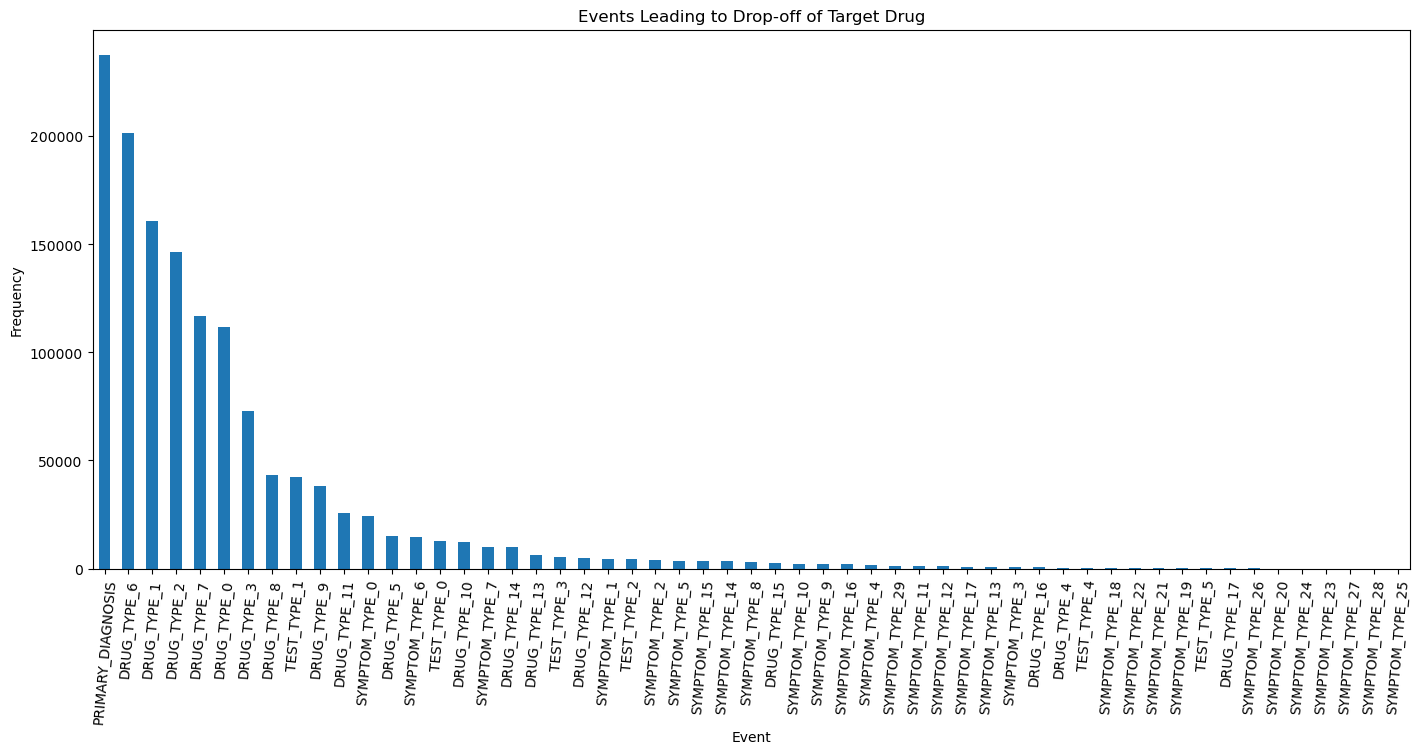

In [23]:
# Plot the events leading to drop-off

plt.figure(figsize=(17, 7))
frequency.plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.xticks(rotation=85)
plt.title('Events Leading to Drop-off of Target Drug')
plt.show()

From the above,what events are driving a patient to stop taking “Target Drug” is

PRIMARY_DIAGNOSIS DRUG_TYPE_6 DRUG_TYPE_1 These Incidents are the top 3 events to stop taking the "TARGET DRUG"

And Patients dropping off in the months of april, may, june and october are comparitively higher than the rest.